In [5]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.transforms import v2

# 0. Loading Dataset

In [57]:
csv_path= os.path.join("..","datasets","FakeAVCeleb_v1.2","FakeAVCeleb_v1.2","meta_data.csv")
dataset_path= os.path.join("..","datasets","FakeAVCeleb_v1.2","FakeAVCeleb_v1.2")

real_video_real_audio_paths= []
fake_video_real_audio_paths= []
real_video_fake_audio_paths= []
fake_video_fake_audio_paths= []

df= pd.read_csv(csv_path)
df= df.rename(columns={"Unnamed: 9":"file_path"})
for i in df["file_path"]:
    path= i.removeprefix("FakeAVCeleb/")
    full_path= os.path.join(dataset_path, path)
    full_path= os.path.normpath(os.path.join(dataset_path, path))
    
    if "RealVideo-RealAudio" in full_path:
        real_video_real_audio_paths.append(full_path)
    elif "FakeVideo-RealAudio" in full_path:
        fake_video_real_audio_paths.append(full_path)
    elif "RealVideo-FakeAudio" in full_path:
        real_video_fake_audio_paths.append(full_path)
    elif "FakeVideo-FakeAudio" in full_path:
        fake_video_fake_audio_paths.append(full_path)

print(len(real_video_real_audio_paths)+len(fake_video_real_audio_paths)+len(real_video_fake_audio_paths)+len(fake_video_fake_audio_paths))

21566


# 1. Data Analysis

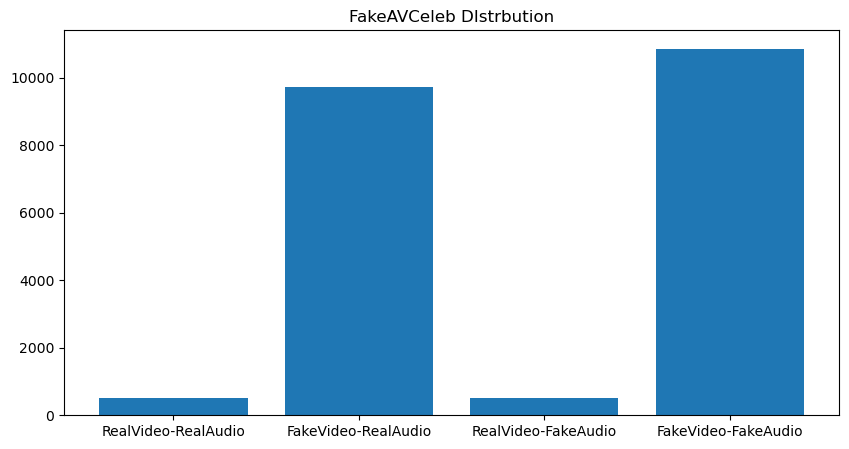

In [64]:
plt.figure(figsize=(10,5))
plt.title("FakeAVCeleb DIstrbution")
plt.bar( ["RealVideo-RealAudio","FakeVideo-RealAudio","RealVideo-FakeAudio","FakeVideo-FakeAudio"]
        ,[len(real_video_real_audio_paths),len(fake_video_real_audio_paths),len(real_video_fake_audio_paths),len(fake_video_fake_audio_paths)]);
